In [1]:
from matplotlib import pyplot as plt
import os
import csv
import pandas as pd
import numpy as np
import cv2

In [2]:
# %matplotlib notebook

In [2]:
file_path = 'hand_labels_hsv_val_float.csv'

df = pd.read_csv(file_path)

# removing 1st column containing label name ('orange cone')
df = df.drop(df.columns[0], axis=1)

data = df.to_numpy(dtype=np.float64)

In [3]:
#### adjusting for floating values ####
### TODO: shift hue

data[:, 0] /= 2
data[:, 1] *= 255
data[:, 2] *= 255

print(data)

[[  2.3463688  188.6156715  241.999998  ]
 [  2.3463688  189.3983175  241.0000002 ]
 [  2.35955025 187.56194775 241.999998  ]
 ...
 [179.6        239.062449   160.000005  ]
 [179.59732    243.55764    155.9999985 ]
 [179.59732    248.33328765 153.        ]]


In [4]:
with open("hand_labels_hsv_val_float_fixed.csv", 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Label', 'H', 'S', 'V'])
    for color in data:
        csvwriter.writerow(["Orange cone", color[0], color[1], color[2]])

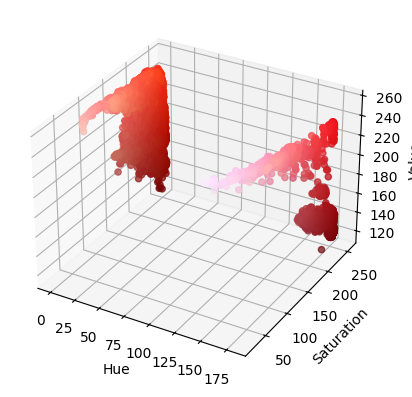

In [19]:
#### Function for plotting learned parameters ######
# def plot_params(x_train, mus=None, Sigmas=None):
x_train = data

# Original plot code with modifications to include the ellipse
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors_rgb = [cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_HSV2RGB)[0][0] for color in x_train]
hs = [color[0] for color in x_train]  
ss = [color[1] for color in x_train]  
vs = [color[2] for color in x_train] 
colors_normalized = [[r/255, g/255, b/255] for r, g, b in colors_rgb]
ax.scatter(hs, ss, vs, color=colors_normalized, alpha=0.75)

# for i in range(len(mus)):
#     mu, Sigma = mus[i], Sigmas[i]
#     eigenvalues, eigenvectors = np.linalg.eig(Sigma)

#     # Plot mu
#     ax.scatter([mu[0]], [mu[1]], [mu[2]], color='blue', s=100, label=f'Mean: {mu}')

#     # Plot eigenvectors
#     for i in range(len(eigenvalues)):
#         # Scale the eigenvectors by the square root of their eigenvalues (standard deviation)
#         vec_end = mu + np.sqrt(eigenvalues[i]) * eigenvectors[:, i]
#         ax.quiver(mu[0], mu[1], mu[2], eigenvectors[0, i], eigenvectors[1, i], eigenvectors[2, i], length=np.sqrt(eigenvalues[i]), normalize=True, label=f'Eigenvec {i+1}')

ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
# # set orientation of plot
# ax.view_init(elev=90, azim=-90)

# plt.legend()
plt.show()

(42627,)


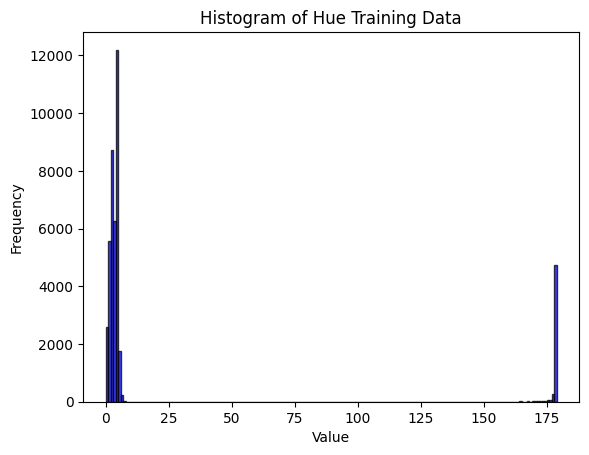

In [13]:
hue_data = data[:, 0]
print(hue_data.shape)

# Plotting the histogram
plt.hist(hue_data, bins=180, alpha=0.75, color='blue', edgecolor='black')

# Adding labels and title for clarity
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Hue Training Data')

# Display the plot
plt.savefig("original_hue_histogram.png")